100%|██████████| 133/133 [01:33<00:00,  1.42it/s]


MoJoFM 0.471
method-MoJoFM 0.502
field-MoJoFM 0.463


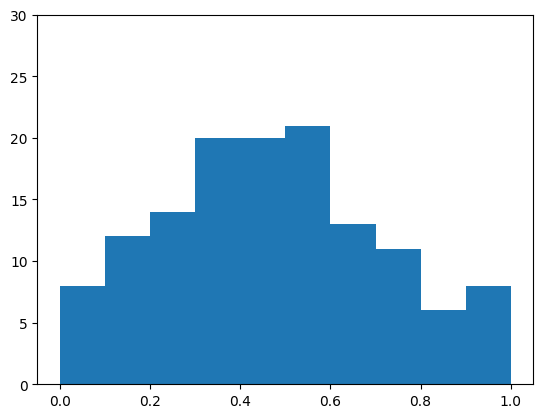

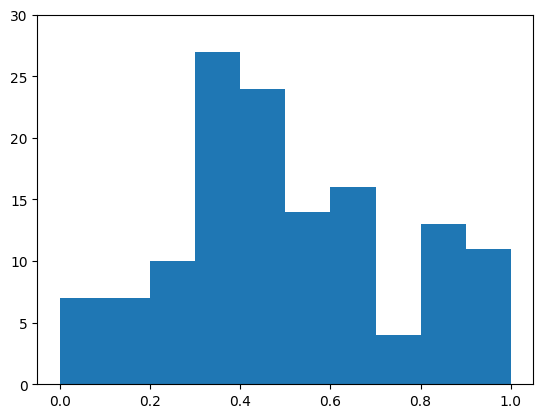

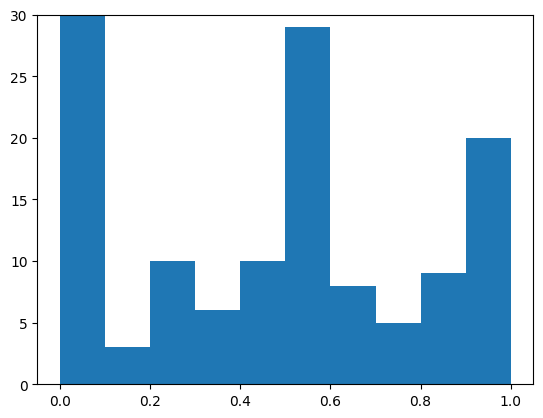

In [2]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from god_class import DictHandler
from approach import ClusterSeparate
from baseline1 import Baseline1
import show_result as sr

dict_handler = DictHandler('GodClassRefactorDictionary.csv')

good_classes = dict_handler.get_filtered_classes()
m_data = []
mm_data = []
fm_data = []
for c in tqdm(good_classes):
    cluster_separate = ClusterSeparate(c)
    cluster_separate.separate_to_group()
    cluster_separate.split_group_by_position()
    cluster_separate.merge_adjacent_single_method()
    cluster_separate.merge_separate_group()
    cluster_separate.handel_fields()
    m_data.append(cluster_separate.get_mojofm(field=True))
    mm_data.append(cluster_separate.get_mojofm(field=False))
    fm_data.append(cluster_separate.get_field_mojofm())
sr.draw_mojofm(m_data, title='MoJoFM')
sr.draw_mojofm(mm_data, title='method-MoJoFM')
sr.draw_mojofm(fm_data, title='field-MoJoFM')
plt.show()

above is ClassSplitter's result on 133 God class database
(all/method only/field only)

100%|██████████| 133/133 [04:17<00:00,  1.94s/it]


wins: 71, ties: 20, losses: 42, huge rise(40): 53 , out of total number 133
compare MoJoFM: 0.336 to 0.471
t-statistic: -4.609624993102334
p-value: 6.288294492412905e-06
wins: 82, ties: 17, losses: 34, huge rise(40): 65 , out of total number 133
method-compare MoJoFM: 0.326 to 0.502
t-statistic: -5.97311801296508
p-value: 7.49480190961941e-09
wins: 33, ties: 62, losses: 38, huge rise(40): 26 , out of total number 133
field-compare MoJoFM: 0.447 to 0.463
t-statistic: -0.35927401467707465
p-value: 0.7196773008255362


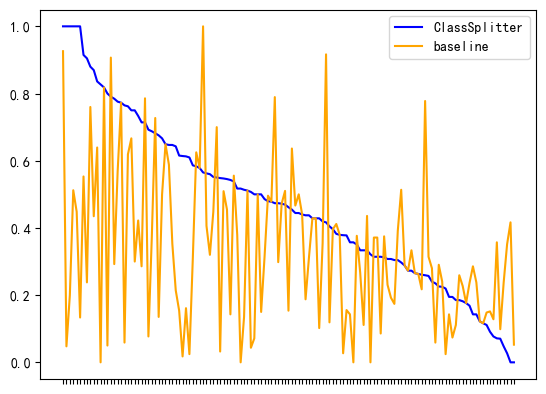

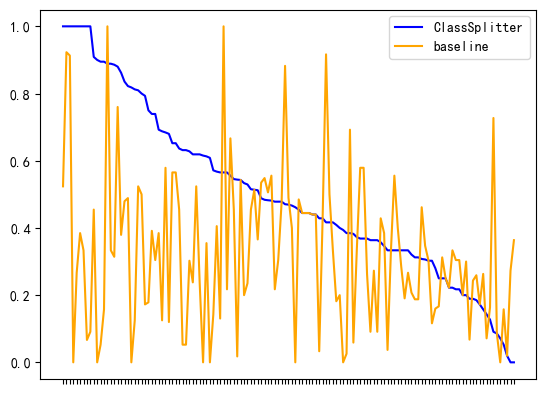

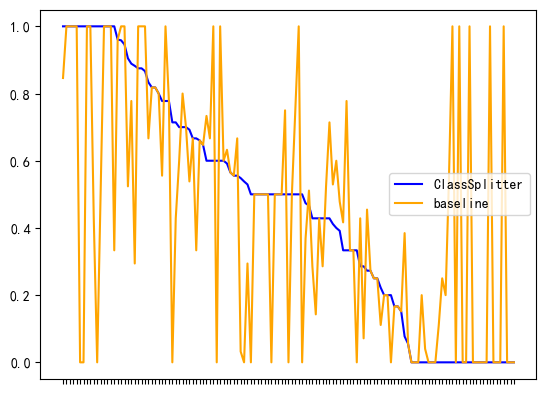

In [4]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from god_class import DictHandler
from approach import ClusterSeparate
from baseline1 import Baseline1
import show_result as sr

dict_handler = DictHandler('GodClassRefactorDictionary.csv')
good_classes = dict_handler.get_filtered_classes()
m_data1 = []
m_data2 = []
fm_data1 = []
fm_data2 = []
mm_data1 = []
mm_data2 = []
for c in tqdm(good_classes):
    baseline1 = Baseline1(c)
    baseline1.original_graph_to_chain()
    baseline1.original_chain_to_groups()
    baseline1.handel_fields()
    m_data1.append((baseline1.get_mojofm(field=True)))
    mm_data1.append(baseline1.get_mojofm(field=False))
    fm_data1.append((baseline1.get_field_mojofm()))
    cluster_separate = ClusterSeparate(c)
    cluster_separate.set_use_similarity([1, 1, 1, 1])
    cluster_separate.separate_to_group()
    cluster_separate.split_group_by_position()
    cluster_separate.merge_adjacent_single_method()
    cluster_separate.merge_separate_group()
    cluster_separate.handel_fields()
    m_data2.append(cluster_separate.get_mojofm(field=True))
    mm_data2.append(cluster_separate.get_mojofm(field=False))
    fm_data2.append(cluster_separate.get_field_mojofm())
m_data = [(i, j) for i, j in zip(m_data1, m_data2)]
mm_data = [(i, j) for i, j in zip(mm_data1, mm_data2)]
fm_data = [(i, j) for i, j in zip(fm_data1, fm_data2)]
sr.draw_compare(m_data)
sr.draw_compare(mm_data, title='method-compare')
sr.draw_compare(fm_data, title='field-compare')
plt.show()

above is ClassSplitter's result compaired with baseline(Bavota's) on 133 God class database
(all/method only/field only)